## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Read Dataset
df = pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,free/reduced,none,37,59,51
1,male,group A,some college,standard,none,61,61,57
2,male,group D,bachelor's degree,standard,completed,83,72,81
3,male,group C,associate's degree,standard,none,76,57,60
4,male,group B,associate's degree,free/reduced,completed,75,79,73


In [10]:
df.shape

(1000, 8)

## 3. Data Checks to perform 
- Check missing values 
- check Duplicates
- Check Data types 
- Check The number of unquie values of each column 
- check various categories present in the different categorical columns

In [11]:
## Check missing values 
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Insights 
> there are no missing values

In [13]:
# Check Duplicate 
df.duplicated().sum()

0

## Insights
> there is no duplicates in df

In [15]:
# Check Datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [16]:
# Check the number of unique values of each columns 
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     76
reading score                  69
writing score                  75
dtype: int64

In [17]:
## Check the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.988000,69.614000,68.488000
std,15.328497,14.924602,15.607609
min,4.000000,11.000000,12.000000
25%,56.000000,59.000000,58.000000
50%,68.000000,70.000000,69.000000
75%,78.000000,81.000000,80.000000
max,100.000000,100.000000,100.000000


## Insights
- From the above description of numerical data. means are very close to each other - Between 66 to 69
- all the standard deviation also close between 14.92 to 15.6
- while there is minimum of 4 for the maths, other are having 11 and 12 

In [19]:
# Explore More information about data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,free/reduced,none,37,59,51
1,male,group A,some college,standard,none,61,61,57
2,male,group D,bachelor's degree,standard,completed,83,72,81
3,male,group C,associate's degree,standard,none,76,57,60
4,male,group B,associate's degree,free/reduced,completed,75,79,73


In [25]:
## Segregate Numerical andd Categorical Features

numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

In [29]:
print(categorical_features)
print()
print(numerical_features)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

['math score', 'reading score', 'writing score']


In [30]:
df['gender'].value_counts()

male      503
female    497
Name: gender, dtype: int64

In [36]:
# aggregate the total score with the mean
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group C,some college,free/reduced,none,37,59,51,147,49.000000
1,male,group A,some college,standard,none,61,61,57,179,59.666667
2,male,group D,bachelor's degree,standard,completed,83,72,81,236,78.666667
3,male,group C,associate's degree,standard,none,76,57,60,193,64.333333
4,male,group B,associate's degree,free/reduced,completed,75,79,73,227,75.666667


## Exploring More Visualization

<AxesSubplot:xlabel='average', ylabel='Count'>

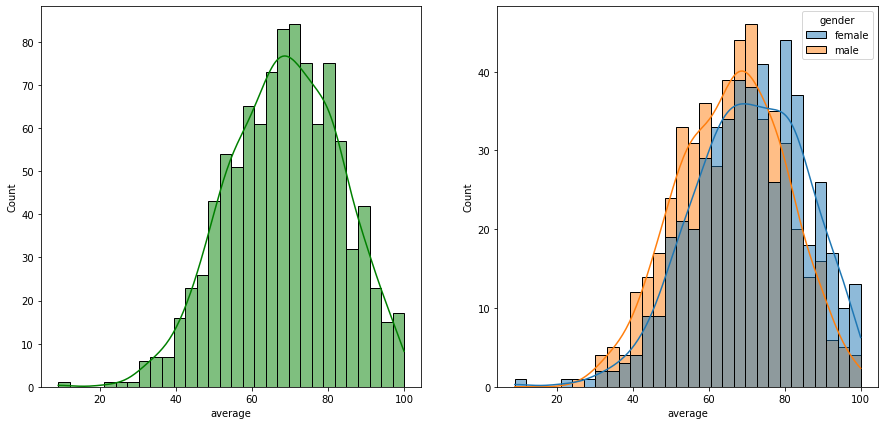

In [59]:
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

## Insights 
- Female studnets tend to perform well than male student

<AxesSubplot:xlabel='average', ylabel='Count'>

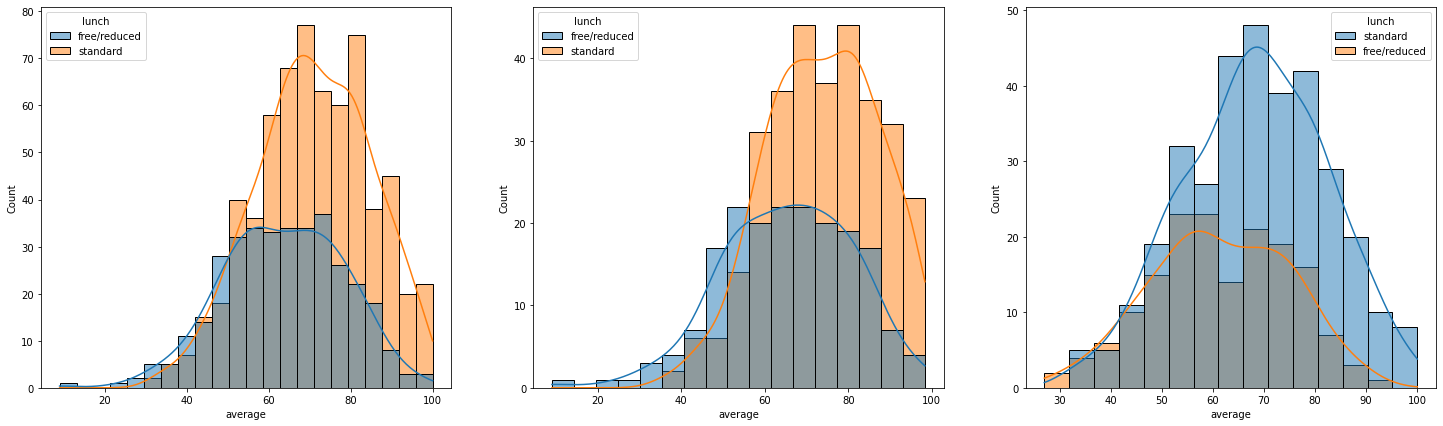

In [69]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data=df,x='average',hue='lunch',kde='true')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',hue='lunch',kde=True)

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',hue='lunch',kde=True)

## Insights 
- standard lunch help student perform well in exam
- standad lunch hels perform well in exam be it a male or female

In [67]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group C,some college,free/reduced,none,37,59,51,147,49.000000
1,male,group A,some college,standard,none,61,61,57,179,59.666667
2,male,group D,bachelor's degree,standard,completed,83,72,81,236,78.666667
3,male,group C,associate's degree,standard,none,76,57,60,193,64.333333
4,male,group B,associate's degree,free/reduced,completed,75,79,73,227,75.666667


<AxesSubplot:xlabel='average', ylabel='Count'>

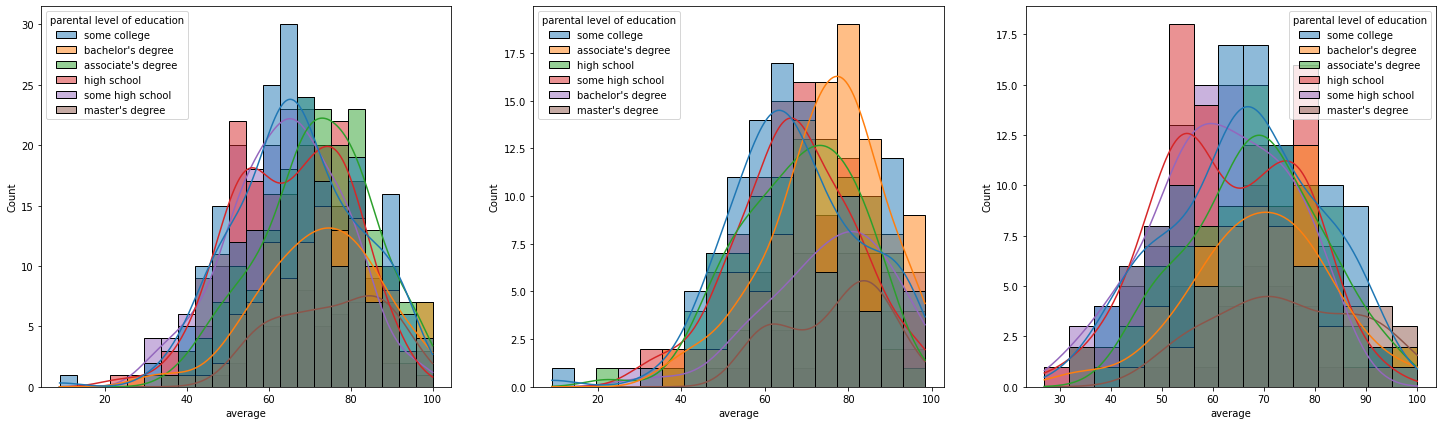

In [71]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data=df,x='average',hue='parental level of education',kde=True)

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',hue='parental level of education',kde=True)

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',hue='parental level of education',kde=True)

### Insights
- in general parent's education dont help student perfrom well in exam
- 2n plot whows that parent's whose educatoin associate degree or master's degree their male child tend to perform well in exam 
- 3rd plot we can see that there is no effectof parent education on female students

<AxesSubplot:xlabel='average', ylabel='Count'>

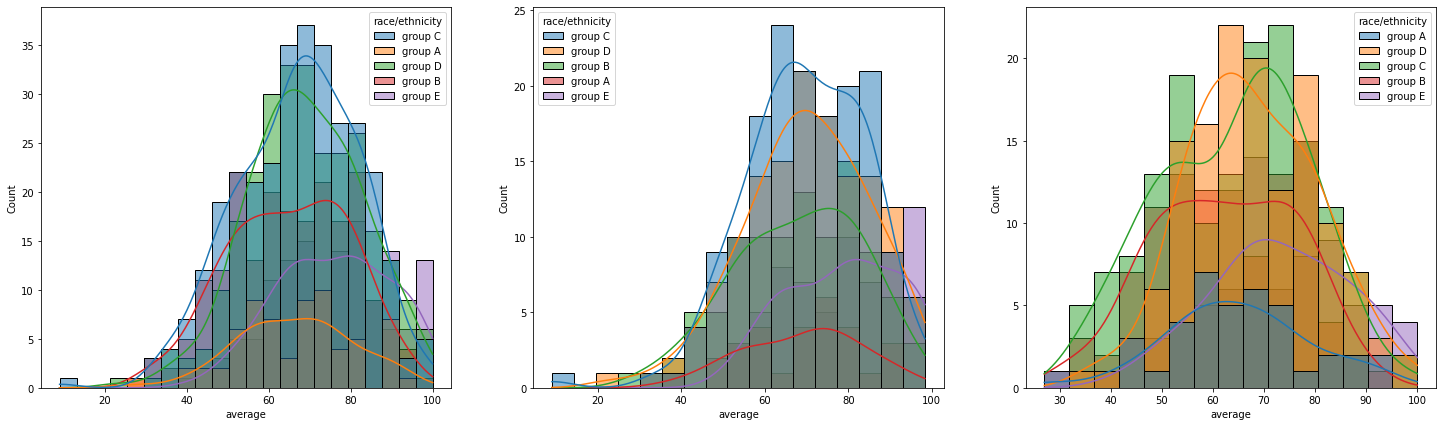

In [72]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data=df,x='average',hue='race/ethnicity',kde=True)

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',hue='race/ethnicity',kde=True)

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',hue='race/ethnicity',kde=True)

## insights 
- Student of group a and group b trends to perform poorly in exam 
- student of group A and group b   perform poorly in exam irrespective of wether they are male or female

<AxesSubplot:>

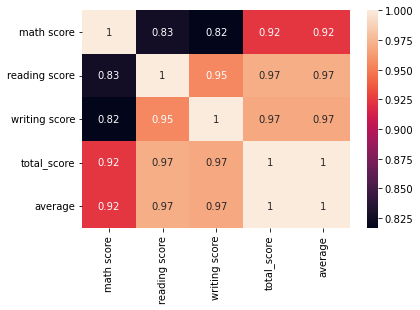

In [73]:
sns.heatmap(df.corr(),annot=True)